# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: whether the customers converted to paying or not

#### 2. What are the predictors/covariates? 

Answer: age, gender,location, profession, days since last log in, and activity score 

#### 3. What timeframe is this data relevent for?

Answer: Jan-Apr 2015 

#### 4. What is the hypothesis?

Answer: demographics and usage data will allow us to predict customer payments 

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admitted 1 = admitted | categorical
gre | GRE score; integer | continuous from 0 to 800 
gpa | College GPA; integer | continuous from 0 to 4
prestige |prestige rank of college attended(1 = high, 4 = low)  | categorical


We would like to explore the association between GRE scores, GPA, and College prestige with Admission rate to graduate school 

#### 2. What is the outcome?

Answer: whether the student was admitted or not

#### 3. What are the predictors/covariates? 

Answer: GRE score, GPA, and college prestige

#### 4. What timeframe is this data relevent for?

Answer: a time frame is not given in this data set, but let's assume it's for June 2015 

#### 4. What is the hypothesis?

Answer: The prestige of the college a student attends is a stronger indicator of admission success than the students GPA or GRE scores.

    Using the above information, write a well-formed problem statement. 


## Problem Statement
Determine which students are most likely to be admitted to graduate school, using GRE scores, college GPA, and colleges prestige ranking based on admissions data collected in June 2015.

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goals of the exploratory analysis are to get a feel for the range and basic statistical measure of each column of data (eg. max/min/mean) and the completeness of the data (ie. are there null values?). making sure that the the data is complete and the data distributions are understood, I would then check for correlation between GPA, GRE, college prestige, and the admission rate.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  #importing stats packages
from sklearn import metrics   #importing stats packages

In [7]:
data = pd.read_csv('admissions.csv')

In [30]:
data.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [35]:
clean_data = data[(data.prestige > 0) & (data.gre > 0) & (data.gpa > 0)]
clean_data.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### 2a. What are the assumptions of the distribution of data? 

Answer: the assumption is that GRE and GPA have a normal distribution, while Admit rate and prestige may be skewed, since they are categorical values.

#### 2b. How will determine the distribution of your data? 

Answer: if gre and gpa are normal distributions the median, mode, and mean should be equal. The mean, median, and mode are not equal so these are not normal distributions.

In [51]:
clean_data[['gre','gpa']].mean()

gre    587.858942
gpa      3.392242
dtype: float64

In [52]:
clean_data[['gre','gpa']].mode()

,gre,gpa
0,620.0,4.0


In [53]:
clean_data[['gre','gpa']].median()

gre    580.0
gpa      3.4
dtype: float64

#### 3a. How might outliers impact your analysis? 

Answer: Outliers could skew the average

#### 3b. How will you test for outliers? 

Answer: we can use the box plot function. Both GRE and GPA have outliers that may be skewing the data. These outliers can be cleaned out and the normal distribution rechecked.

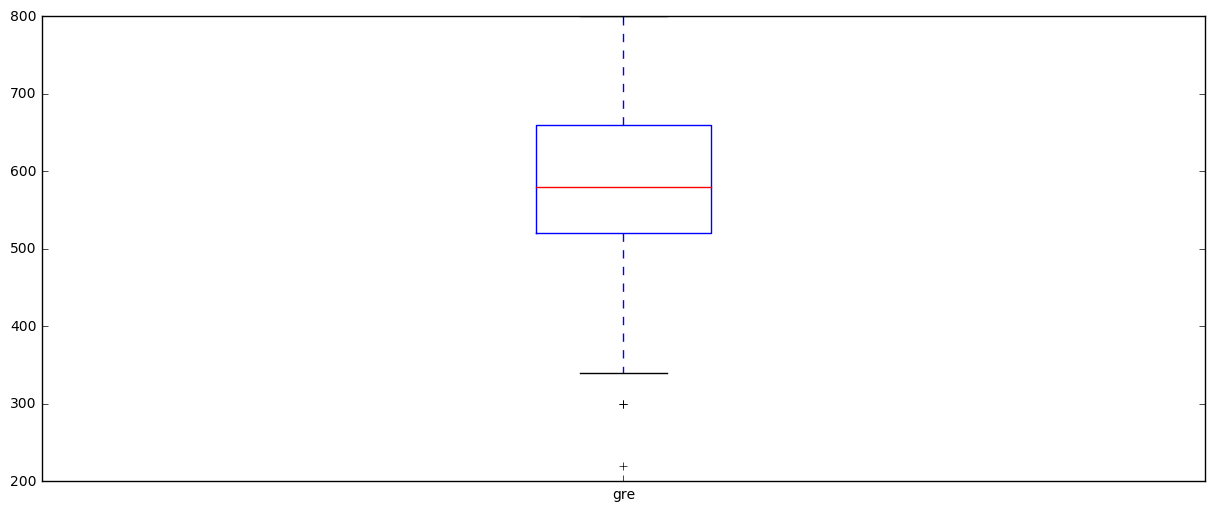

In [56]:
data['gre'].plot(kind='box') #outlier detected

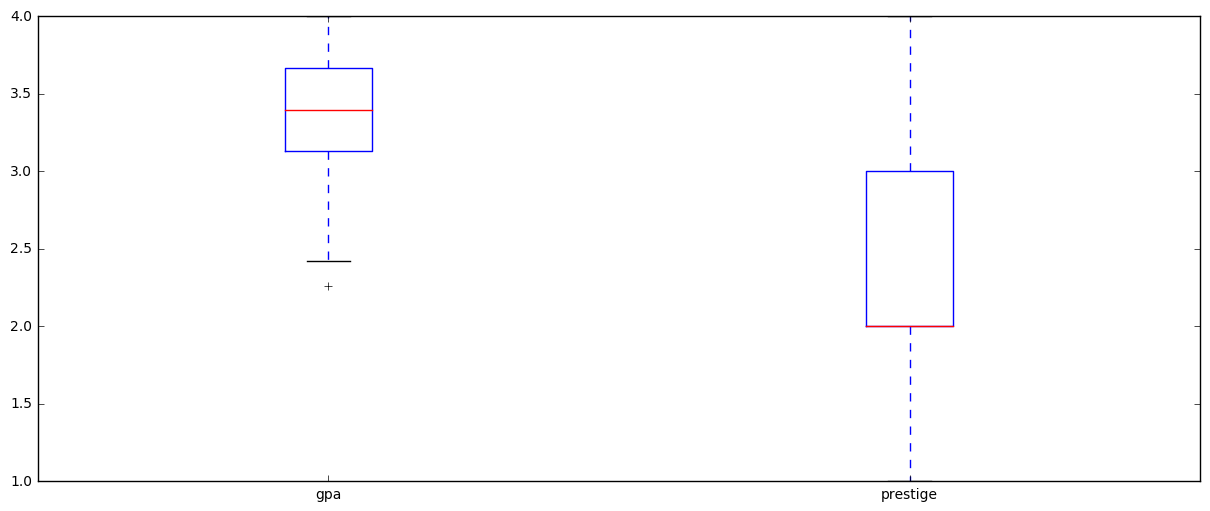

In [62]:
data[['gpa','prestige']].plot(kind='box')  #outlier detected in gpa

In [65]:

cleaner_data = clean_data[(clean_data.gpa > 2.4) & (clean_data.gre > 315)]
cleaner_data.describe()   #removing the outliers

,admit,gre,gpa,prestige
count,392.000000,392.000000,392.000000,392.000000
mean,0.318878,591.428571,3.400153,2.479592
std,0.466637,111.781665,0.374877,0.945898
min,0.000000,340.000000,2.420000,1.000000
25%,0.000000,520.000000,3.140000,2.000000
50%,0.000000,590.000000,3.400000,2.000000
75%,1.000000,680.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [67]:
cleaner_data[['gre','gpa']].mean()

gre    591.428571
gpa      3.400153
dtype: float64

In [69]:
cleaner_data[['gre','gpa']].mode()

,gre,gpa
0,620.0,4.0


In [71]:
cleaner_data[['gre','gpa']].median()  #median and mean are much closer after removing outliers

gre    590.0
gpa      3.4
dtype: float64

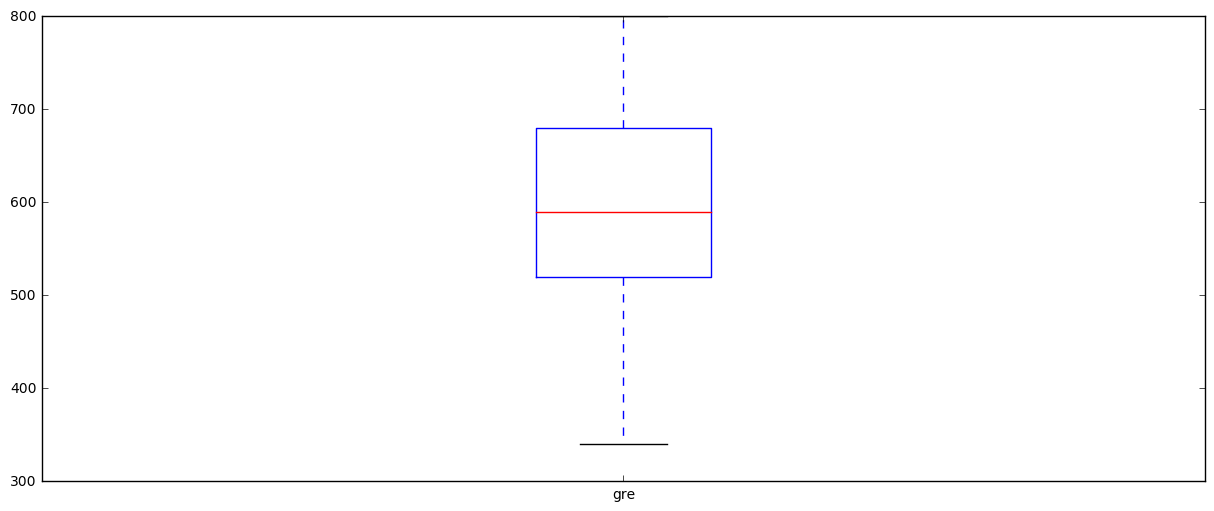

In [73]:
cleaner_data[['gre']].plot(kind = 'box')

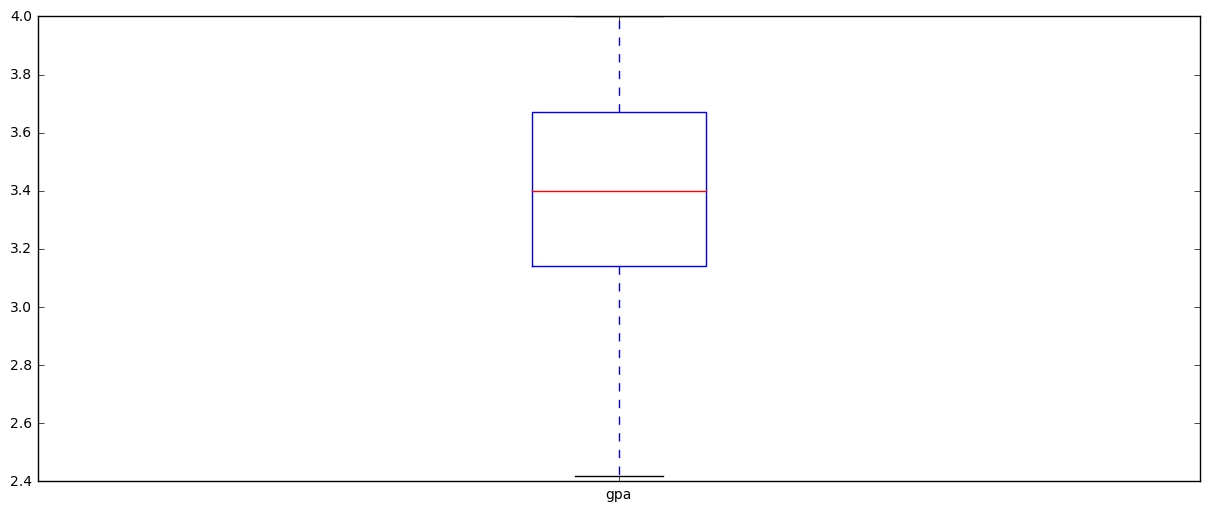

In [74]:
cleaner_data[['gpa']].plot(kind = 'box')

#### 4a. What is colinearity? 

Answer: colinearity is when 2 variables can easily be predicted by one another. for this data set it is very likely that GPA and GRE scores would be colinear 

#### 4b. How will you test for colinearity? 

Answer: use the corr() function. 

In [61]:
data.corr()  # gre and gpa do have the most correlation of the variable, but it is not significant

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer:
1) check for missing data by running .describe() and checking count
2) specify data should have a > 0 value to remove null data
3) check for outliers with the box plot function
4) after determining where outliers are, adjust the range of the data to screen out the outliers
5) check the distribution of the data by checking the mean, median, and mode to see if distributions are normal or skewed
6) check if any variable are colinear (predict each other) with the .corr() function

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model